# Breast Cancer Classification

## Project Overview
This project focuses on the binary classification of breast tumors as either Malignant (Cancerous) or Benign (Non-cancerous) using clinical features derived from digital images of fine needle aspirates (FNA). In a healthcare context, the priority is to minimize False Negatives (missing a cancer case). Therefore, this project emphasizes optimizing Recall alongside overall accuracy.

## Data Acquisition & Features

Source: Breast Cancer Wisconsin (Diagnostic) dataset from the UCI Machine Learning Repository.

Data Retrieval: Integrated directly using the ucimlrepo library.

Attributes: 30 numerical features representing cell nuclei characteristics (e.g., radius, texture, perimeter, area, and smoothness).

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [4]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
X.shape

(569, 30)

In [6]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

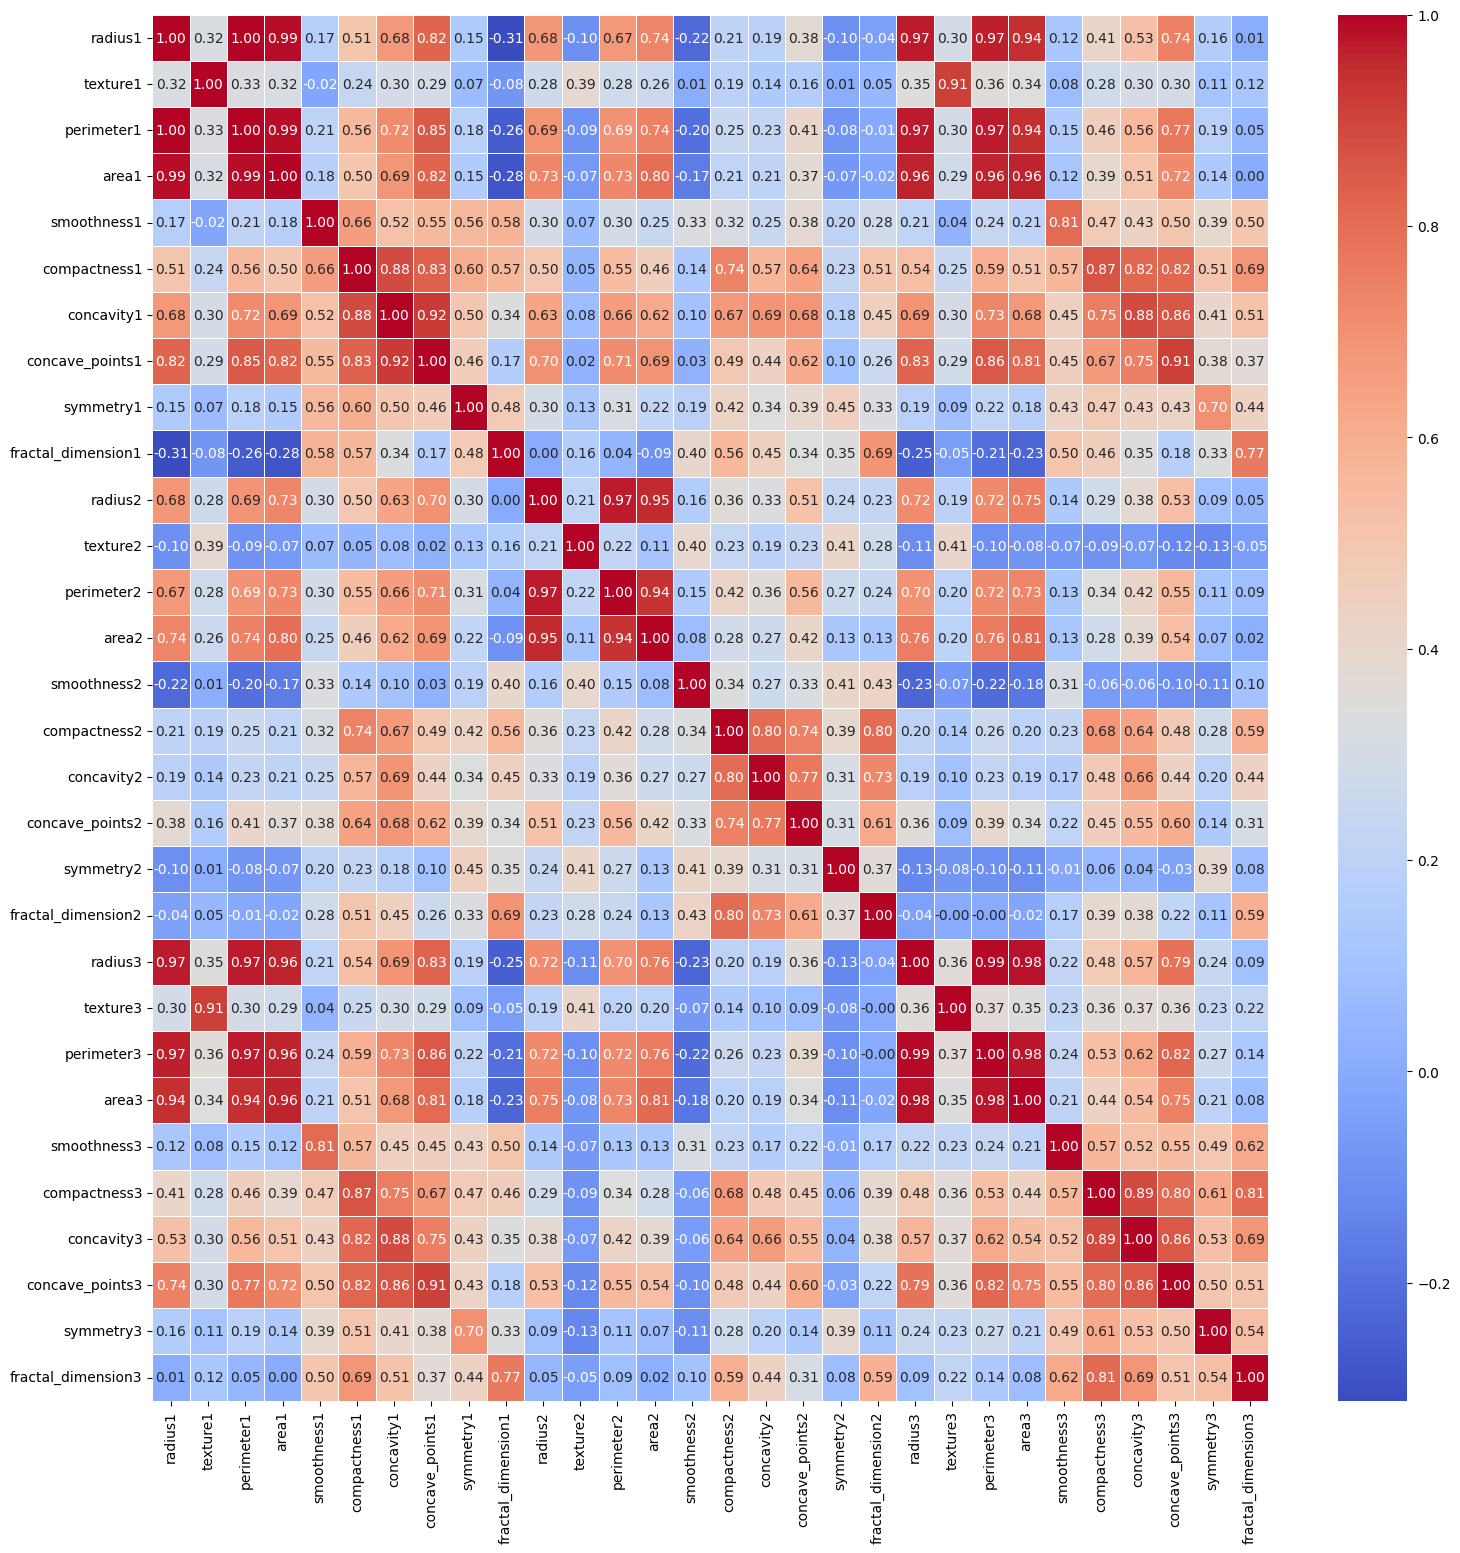

In [8]:
plt.figure(figsize=(18,18))
sns.heatmap(data=X.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.show()

In [9]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [11]:
print(y['Diagnosis'].unique())

['M' 'B']


Diagnosis
B    357
M    212
Name: count, dtype: int64


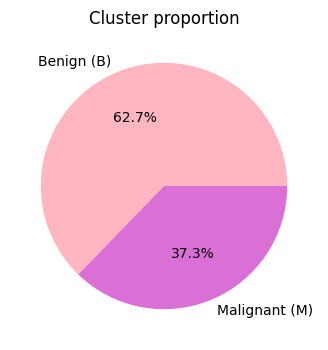

In [12]:
print(y['Diagnosis'].value_counts()),

labels = { 'B': 'Benign (B)', 'M': 'Malignant (M)' }
colors = ['#FFB6C1', '#DA70D6']
plt.figure(figsize=(4,4))
plt.pie(y['Diagnosis'].value_counts(), labels=labels.values(),colors=colors, autopct='%.1f%%')
plt.title('Cluster proportion')
plt.show()

The dataset consists of 62.7% Benign (B) and 37.3% Malignant (M) cases.

(While there is a slight class imbalance, it is manageable through specific modeling techniques like adjusted class weights)

## Data Preprocessing

Label Encoding: Converted categorical targets ('M' and 'B') into numerical format (1 and 0).

In [13]:
y_map = y.copy()
y_map['Diagnosis'] = y_map['Diagnosis'].map({'M': 1, 'B': 0})

In [14]:
y_map.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [15]:
y_map.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

## Random Forest Classifier

I chose the Random Forest algorithm for its robustness against outliers and its ability to handle complex feature interactions.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_map, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators = 200,
    max_depth=None,
    min_samples_leaf = 1,
    random_state = 42,
    class_weight = 'balanced',
    n_jobs=-1
)

In [18]:
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification_report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[70  1]
 [ 3 40]]

Classification_report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Achieved an Accuracy of 96.5%, but with a few False Negatives (Recall for Malignant = 0.93).

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y_map, cv=10, scoring='recall')
print(f"Avg Recall: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Avg Recall: 0.93 (+/- 0.12)


## Threshold Adjustment

In medical diagnostics, a False Negative (failing to detect cancer) carries a much higher risk than a False Positive (a false alarm). To prioritize patient safety and minimize the risk of undiagnosed malignancy, I adjusted the classification threshold from the default 0.5 to a more sensitive 0.3.

In [22]:
y_prob = rf_model.predict_proba(X_test)[:, 1]

new_threshold = 0.3
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

print("\n--- New Threshold (0.3) ---")
print('Accuracy:', accuracy_score(y_test, y_pred_adjusted))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, y_pred_adjusted))
print('\nClassification_report:\n', classification_report(y_test, y_pred_adjusted))


--- New Threshold (0.3) ---
Accuracy: 0.9736842105263158

Confusion Matrix:
 [[68  3]
 [ 0 43]]

Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



This strategic shift increased the model's sensitivity, effectively raising the Recall to 1.00 (100%), ensuring that zero cancer cases were missed in the test set.

## Feature Importance

To understand which cell characteristics most heavily influence the model's decision-making, I analyzed the Feature Importance scores from the Random Forest model.

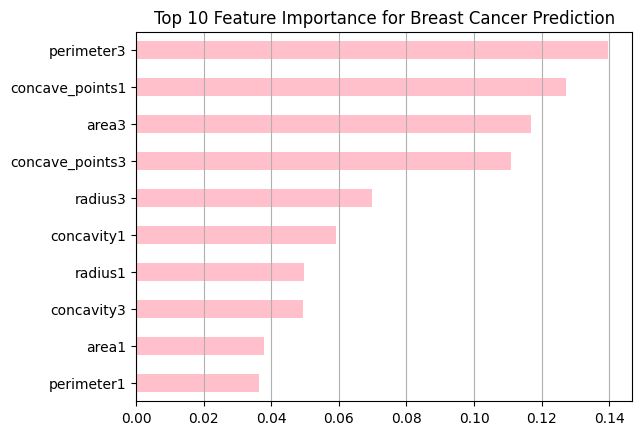

In [23]:
features = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=True).tail(10).plot(kind='barh', color='pink')
plt.title("Top 10 Feature Importance for Breast Cancer Prediction")
plt.grid(axis='x')
plt.show()

Analysis identifies perimeter3, concave_points1, and area3 as the primary diagnostic drivers, with the dominance of worst features highlighting that extreme nuclear abnormalities are the strongest indicators of malignancy.